<a href="https://colab.research.google.com/github/formroller/ML_clone/blob/master/kaggle/pima/diabetes(knn7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Step by Step Diabetes Classification-KNN-detail](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)  
 - 피마 인디언 당뇨병 예측(단계별 KNN)

# 00.Introduce
* 개요  
 이 데이터 세트는 미국 국립 당뇨병 연구소에서 가져온 것이다. 데이터 세트의 목적은 데이터에 포함된 특정 진단값을 기반으로 환자에게 당뇨병이 있는지 여부를 진단적으로 예측하는 것이다. 더 큰 데이터 베이스에서 이러한 인스턴스를 선택하는 것은 몇 가지 제약이 있으며 데이터에 있는 모든 환자는 피마 인디언 혈통의 21세 이상의 여성이다.

* 내용  
 데이터 세트는 여러 의료 예측 변수와 하나의 종속 변수인 OUTCOME(결과)로 구성된다. 예측 변수에는 환자의 임신 횟수, BMI, 인슐린 수준, 나이 등의 변수가 포함된다.  

* 목표  
 **데이터 세트의 환자에게 당뇨병이 있는지 여부를 정확하게 예측하는 기계 학습 모델 구축**



# 1.Load Package

In [23]:
import os
os.chdir('/content/drive/MyDrive/kaggle/pima')

from mlxtend.plotting import plot_decision_regions
# mlxtend 모듈은 데이터의 전처리부터 분류, 군집 등의 모델링까지 다양한 머신 러닝 기능을 제공한다.
# plot_decision_regions는 의사 결정에 의해 데이터 영역이 어떻게 나뉘어 있는지를 시각화한다.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# 2. EDA
Baisc Data Science and ML Pipline

* **OSEMN Pipline**
 * O - Obtaining our data (데이터 획득)
 * S - Scrubbing / Cleaning our data (데이터 정제)
 * E - Exploring / Visualizing our data will allow us to find pattern and trends (데이터 탐색 / 시각화를 통해 패턴과 추세 발견)
 * M - Modeling our data will give us our predictive power as a wizard(데이터 모델링은 예측 능력을 제공한다.)
 * N - INterpreting our data(데이터 해석)

## 데이터 확인

In [24]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 결측치 전처리
0 -> np.nan

In [27]:
pima = diabetes.copy(deep=True)
pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

# 결측치 합계
print(pima.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


데이터 결측치 대치하기 위해 데이터 분포 이해해야 한다. 

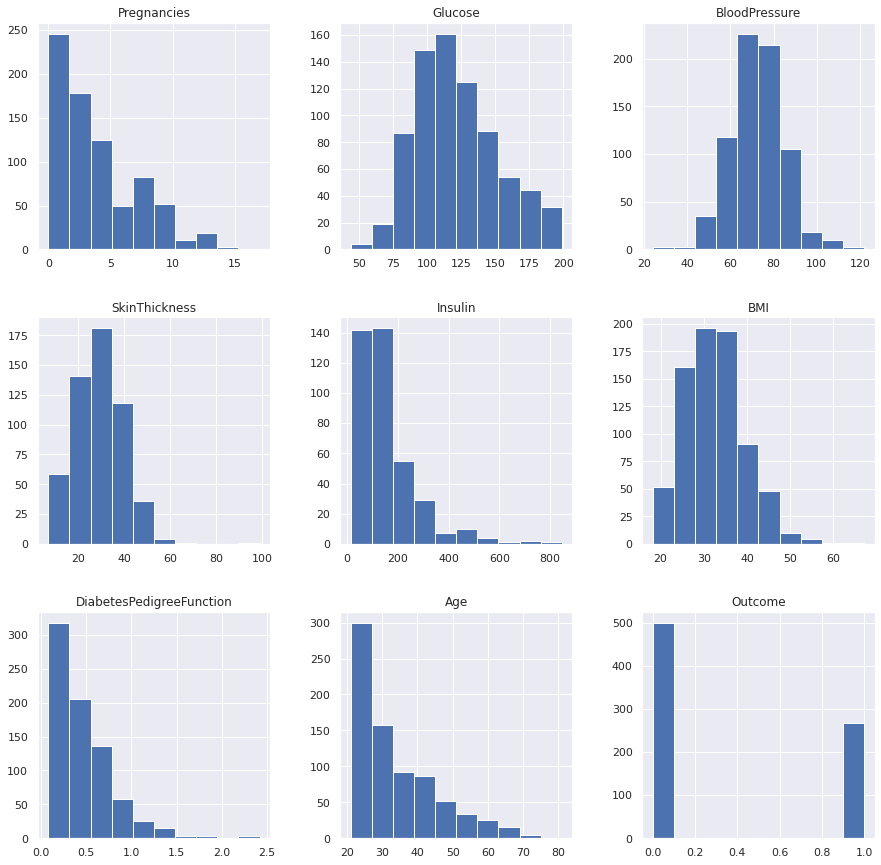

In [28]:
p = pima.hist(figsize=(15,15))

In [29]:
# nan 값이 존재하는 변수들을 평균값으로 대치한다.
pima['Glucose'].fillna(pima['Glucose'].mean(), inplace=True)
pima['BloodPressure'].fillna(pima['BloodPressure'].mean(), inplace=True)
pima['SkinThickness'].fillna(pima['SkinThickness'].mean(), inplace=True)
pima['Insulin'].fillna(pima['Insulin'].mean(), inplace=True)
pima['BMI'].fillna(pima['BMI'].mean(), inplace=True)

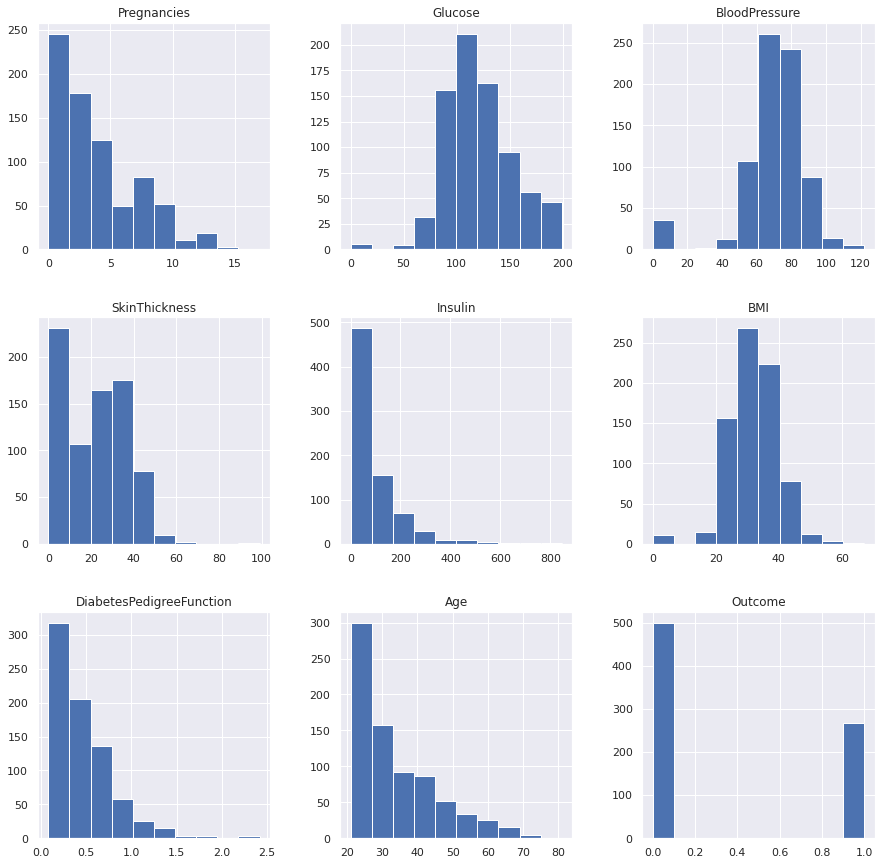

In [30]:
p = diabetes.hist(figsize=(15,15))

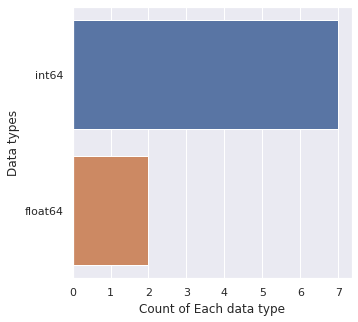

In [31]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
sns.countplot(y=diabetes.dtypes.map(str), data=pima) # columns별 타입 count위해 열 타입을 문자형으로 변경
plt.xlabel('Count of Each data type')
plt.ylabel('Data types')
plt.show()

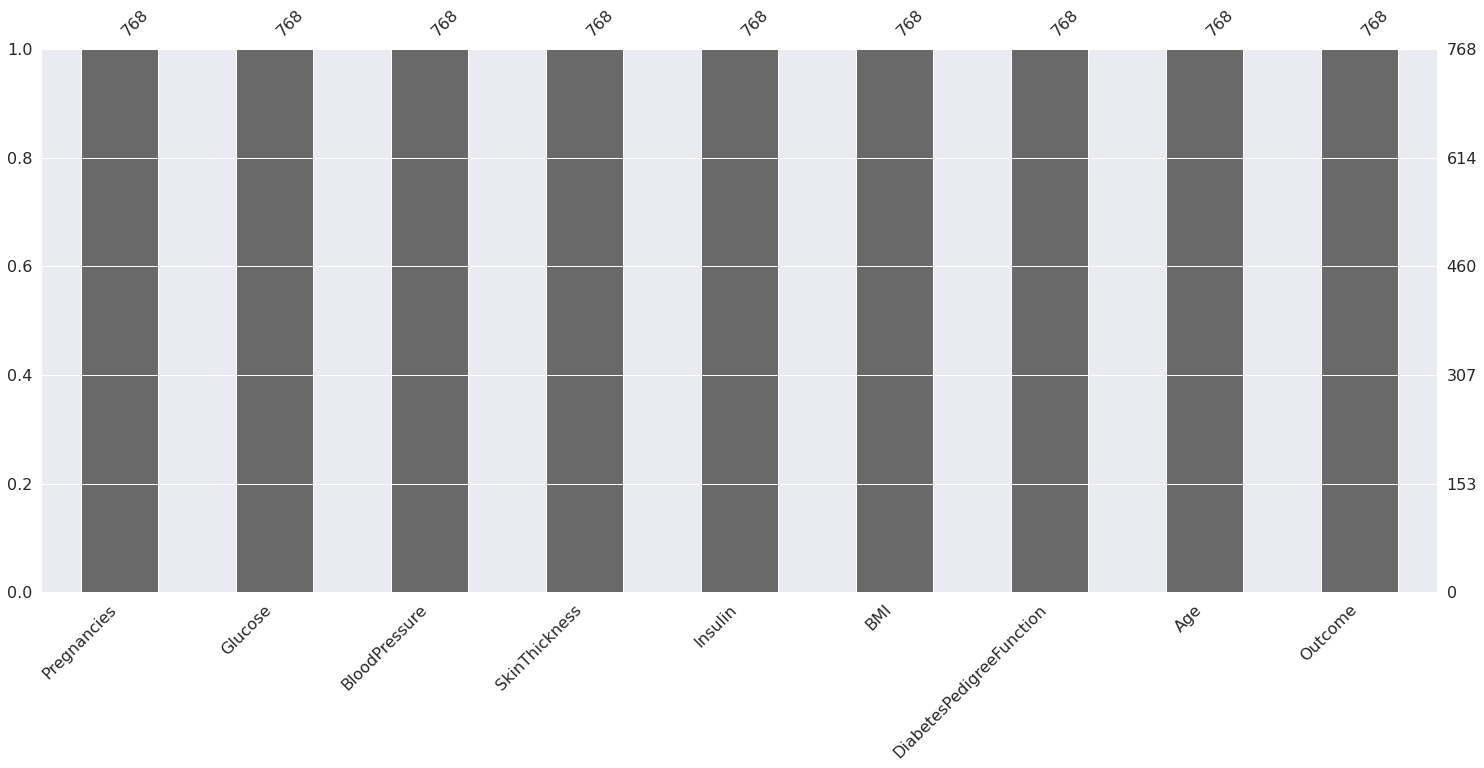

In [32]:
# Null count analysis
plt.figure(figsize=(5,5))
p = msno.bar(diabetes)

0    500
1    268
Name: Outcome, dtype: int64


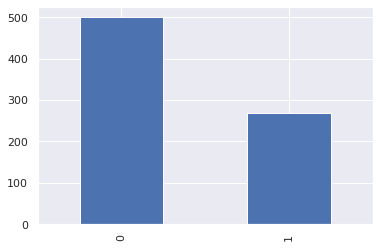

In [33]:
# Outcome 갯수를 플롯팅해 데이터 균형 정도 확인
print(diabetes.Outcome.value_counts())
p = diabetes.Outcome.value_counts().plot(kind='bar')

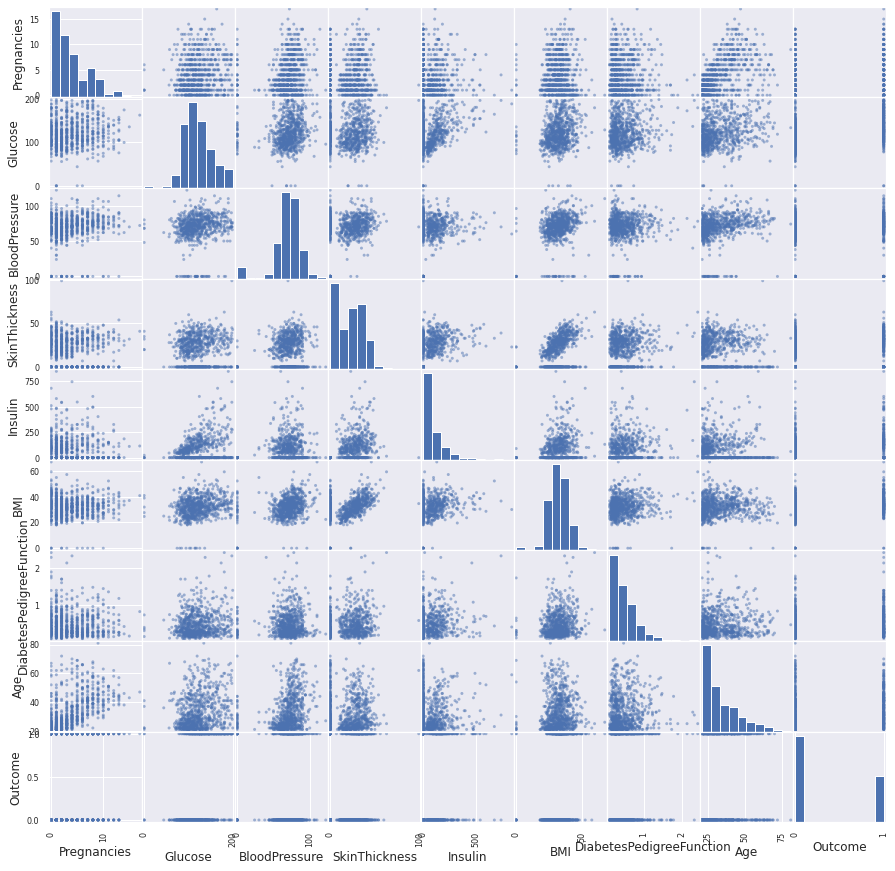

In [34]:
# 결측치 제거하지 않은 데이터의 산점 행렬도
p = scatter_matrix(diabetes, figsize=(15,15))

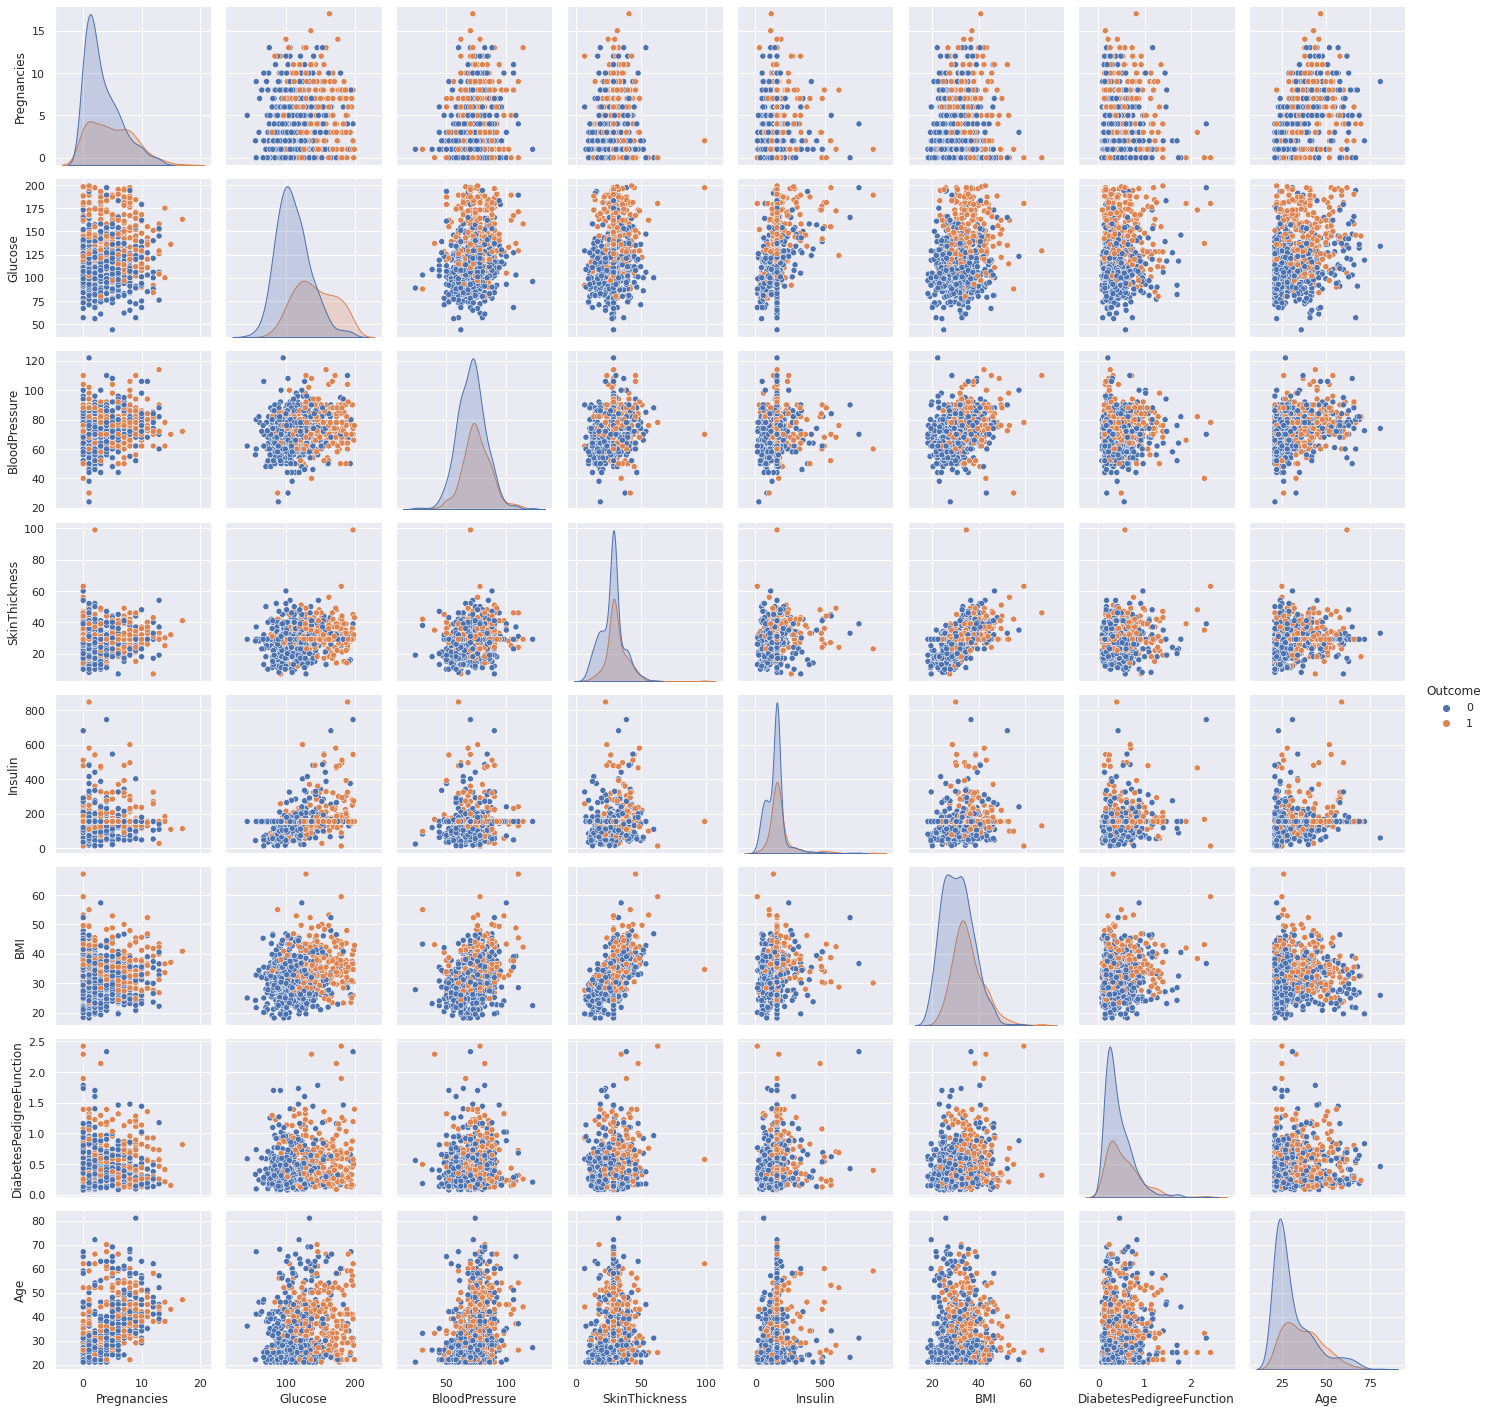

In [35]:
# 결측치 제거한 데이터의 산점 행렬도
p = sns.pairplot(pima, hue='Outcome')

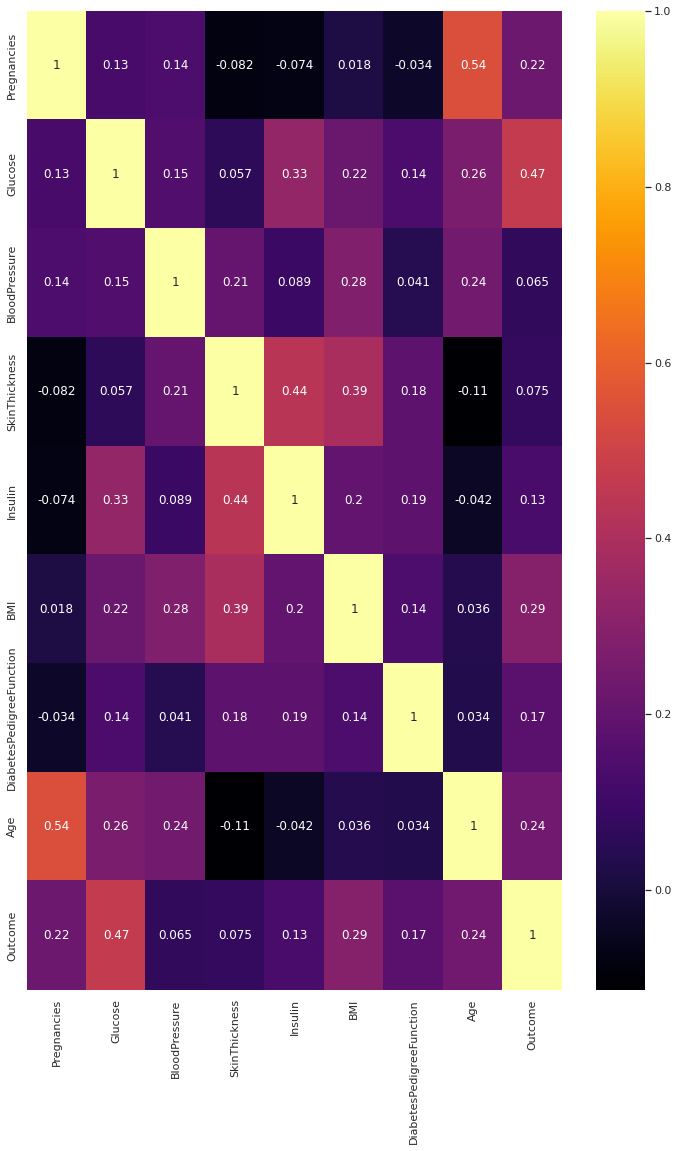

In [36]:
plt.figure(figsize=(12,18))
p = sns.heatmap(diabetes.corr(), annot=True, cmap='inferno')

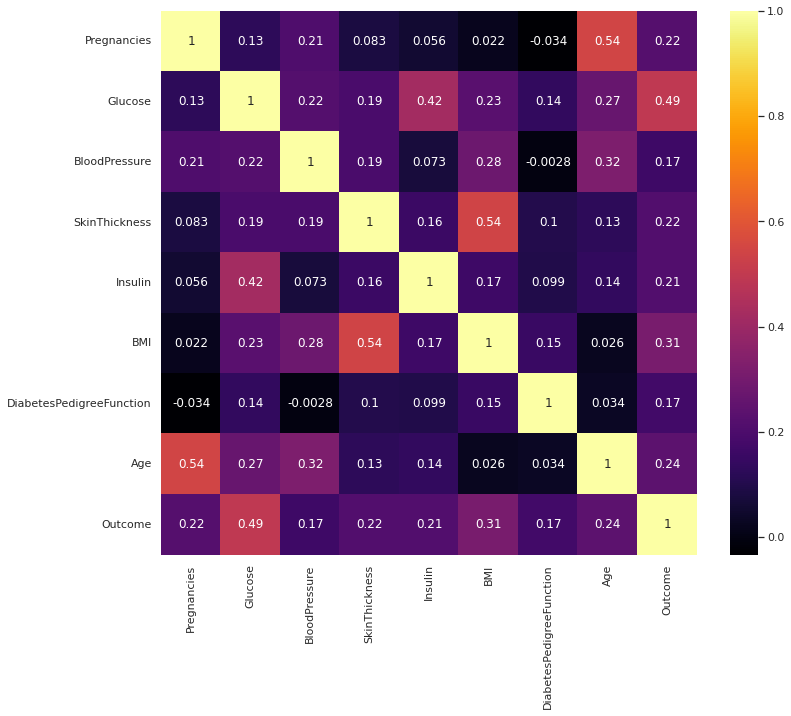

In [37]:
plt.figure(figsize=(12,10))
p = sns.heatmap(pima.corr(), annot=True, cmap='inferno')

## 정규화

In [38]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(pima.drop(['Outcome'], axis=1)), columns=pima.columns[:-1])
y = pima.Outcome

In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)

test_score = []
train_score = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [46]:
# train set에서 얻은 점수
max_train_score = max(train_score)
train_score_ind = [i for i,v in enumerate(train_score) if v == max_train_score]
print(f"Max train score = {max_train_score * 100}% and k = {list(map(lambda x : x+1, train_score_ind))}")

Max train score = 100.0% and k = [1]


In [48]:
# test set에서 얻은 점수
max_test_score = max(test_score)
test_score_ind = [i for i,v in enumerate(test_score) if v == max_test_score]
print(f"Max test score = {max_test_score * 100:.2f}% and k = {list(map(lambda x : x+1, test_score_ind))}")

Max test score = 77.27% and k = [8]


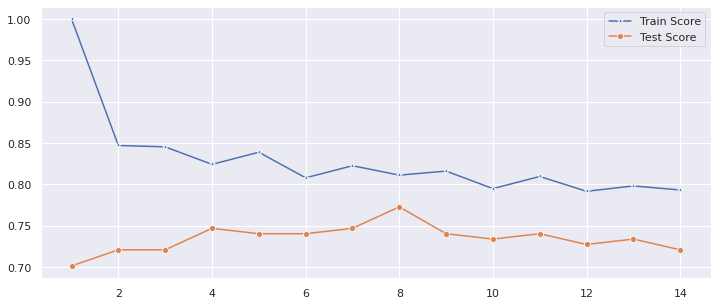

In [49]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_score, marker='*',label='Train Score')
p = sns.lineplot(range(1,15), test_score, marker='o', label='Test Score')

## 모델링

In [50]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7727272727272727

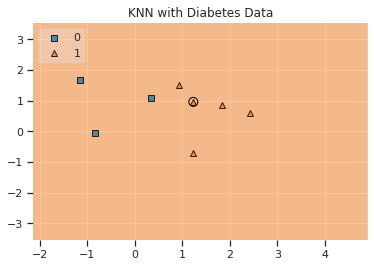

In [52]:
value = 20000
width = 20000

plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values = {2:value, 3:value, 4:value, 5:value, 6:value, 7:value},
                      filler_feature_ranges = {2:width, 3:width, 4:width, 5:width, 6:width, 7:width},
                      X_highlight = X_test.values
                      )

plt.title('KNN with Diabetes Data')
plt.show()

### 예측

In [58]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,88,12,100
1,23,31,54
All,111,43,154


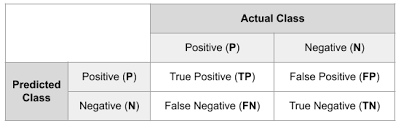



Text(30.5, 0.5, 'Predicted label')

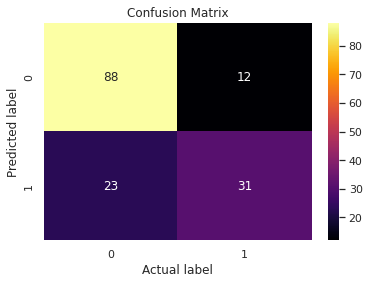

In [60]:
y_pred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='inferno', fmt='g')

plt.title('Confusion Matrix', y=2)
plt.xlabel('Actual label')
plt.ylabel('Predicted label')

In [61]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

ROC AUC Score : 0.8023148148148149	


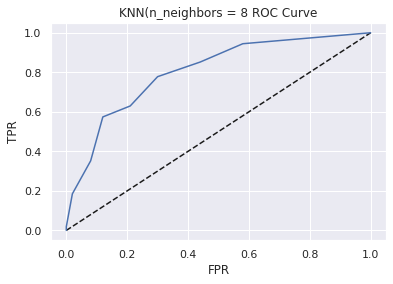

In [74]:
print(f"ROC AUC Score : {roc_auc_score(y_test, y_pred_proba)}\t")

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='knn')
plt.xlabel('FPR') # 위양성율
plt.ylabel('TPR')
plt.title('KNN(n_neighbors = 8 ROC Curve')
plt.show()

### 민감도(Sensitivity)와 특이도(Specificity)
ROC 분석에 등장하는 모들 개념들은 TP, TN, FP, FN 4가지가 조합되어 계산된다. 이들 중 ROC Curve를 그리는데 활용되는 것은 **민감도**와 **특이도**이다.

* 민감도(Sensitivity, TPR)
 - 양성으로 예측하고 실제도 양성인 경우의 비율
 - 양성으로 예측해 맞췄거나, 음성으로 예측해 틀린 경우를 합친 비율.

* 특이도(Specitity, TNR)
 - 음성으로 예측하고 실제도 음성인 경우의 비율
 - 음성으로 예측해 맞췄거나, 양성으로 예측해 틀린 경우를 합친 비율.

* 위양성율(FPR)
  - 1 - 특이도(SP)
  - 실제 음성인 경우를 양성으로 잘못 예측한 경우의 비율


* 정리하자면 ROC Curve에서
 - X축 : 음성인 경우를 양성으로 잘못 예측한 비율(FPR)
 - Y축 : 양성을 제대로 예측한 비율(TPR)  

민감도는 클수록 좋고, 1 - 특이도(위양성율)은 적을수록 좋다

>만약 민감도와 1-특이도(위양성율)이 1:1로 대응(TPR=FPR)이 된다면 어떻게 될까?   
이 경우 ROC Curve는 그래프 참조선상인 y=x의 일차함수에 찍힐 것이다. 이때 AUC 면적은 0.5가 되는데   
이 경우의 진단 도구의 정확성은 최악이라고 볼 수 있다.   
(확률이 50:50이 되므로 진단 도구로써의 가치가 없어진다)
  

따라서 ROC Curve에서 그려지는 곡선 밑 면적(AUC)는 반드시 0.5보다 커야하고 일반적으로 0.7이상 되어야 수용할만한 수준이라고 평가한다.  
-> 즉, AUC 면적이 클수록 해당 검사도구의 정확도가 높다고 볼 수 있다.


|Area Under Curve(AUC)|Evaluation|
|---|---|
|AUC ≥ 0.9 | Excellent|
|0.8 ≤ AUC < 0.9 | Good |
|0.7 ≤ AUC < 0.8 | Fair |
|AUC < 0.7 | Poor |

## 매개변수 튜닝

In [75]:
param_grid = {'n_neighbors' : np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X, y)

print(f"Best Score : {str(knn_cv.best_score_)}")
print(f"Best Parameter : {str(knn_cv.best_params_)}")

Best Score : 0.7812713602187287
Best Parameter : {'n_neighbors': 27}


In [76]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}